# EDA on Automobile Data

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Importing Dataset](#section301)<br>
  - 3.2 [Identifying Missing Values](#section302)<br>
  - 3.3 [Pandas Profiling before Data Preprocessing](#section303)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Preprocessing](#section401)<br>
  - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [**Analysis Based on Automobile Specifications**](#section501)<br>
    - 5.1.1 [Who is the largest automobile maker?](#section50101)<br>
    - 5.1.2 [Most preferred fuel in automobile](#section50102)<br>
    - 5.1.3 [Most used aspiration in automobile](#section50103)<br>
    - 5.1.4 [Number of doors preferred in automobiles](#section50104)<br>
    - 5.1.5 [Most preferred body style in automobiles](#section50105)<br>
    - 5.1.6 [Most preferred drive wheels in cars](#section50106)<br>
    - 5.1.7 [Most preferred engine location in automobiles](#section50107)<br>
    - 5.1.8 [Most preferred engine type in automobiles](#section50108)<br>
    - 5.1.9 [Most preferred number of cylinders in engine](#section50109)<br>
    - 5.1.10 [Most preferred fuel system in engine](#section501010)<br>
    - 5.1.11 [Range of engine size in automobiles](#section501011)<br>
    - 5.1.12 [Range of peak rpm in automobiles](#section501012)<br>
    - 5.1.13 [Range of curb weight in automobiles](#section501013)<br>
    - 5.1.14 [Range of horsepower in automobiles](#section501014)<br>
    - 5.1.15 [Range of price in automobiles](#section501015)<br>
    - 5.1.16 [Correlation analysis](#section501016)<br>
  - 5.2 [**Analysis Based on Automobile Price**](#section502)<br>
    - 5.2.1 [Price based on make](#section50201)<br>
    - 5.2.2 [Price based on body-style](#section50202)<br>
    - 5.2.3 [Price based on body-style and aspiration](#section50203)<br>
    - 5.2.4 [Price based on drive-wheels](#section50204)<br>
    - 5.2.5 [Price vs Automobile specifications](#section50205)<br> 
  - 5.3 [**Analysis Based on Automobile Engine**](#section503)<br>
    - 5.3.1 [Engine size based on engine-type for body-style and fuel-type](#section50301)<br>
    - 5.3.2 [Horsepower based on num-of-cylinders](#section50302)<br>
  - 5.4 [**Analysis Based on Losses**](#section504)<br>
    - 5.4.1 [Normalized losses vs Symboling](#section50401)<br>
6. [Conclusion](#section6)<br>
  - 6.1 [Actionable Insights](#section601)<br>

<a id=section1></a>
## 1. Problem Statement

**Automobile** sector is a growing industry. People really instrusted in new comings in car segment. Some people may look for vehicles with more **power**, some may look for **mileage** and some may look for **body style** etc. Here we arriving relation between automobile **specifications**, **price** and **risk rating** of vehicles.

<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns

<a id=section3></a>
## 3. Loading Data

<a id=section301></a>
### 3.1 Importing Dataset

In [3]:
# Importing the Automobile dataset.

df_car = pd.read_csv('https://github.com/insaid2018/Term-1/raw/master/Data/Projects/Automobile_data.csv')
df_car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


<a id=section302></a>
### 3.2 Identifying Missing Values

In [4]:
df_data = df_car.replace('?',np.NAN) 
df_data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

#### Observations:

- There are **missing** values in **normalized-losses**, **num-of-doors**, **bore**, **stroke**, **horsepower**, **peak-rpm** and **price**

In [5]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

- *info* function gives us the following insights into the df_car dataframe:
    - There are a total of **205 samples (rows)** and **26 columns** in the dataframe.
    - There are **5 columns** with a **float**, **numeric** datatype each and **16 columns** with an **object** datatype.

In [6]:
df_car.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


- *describe* function gives us the following insights into the data:
    - **length**,**width** and **height** columns are almost **normal distribution** because the **mean** value is close to the **median(50%)** value.
    - **curb-weight** is **positive (right) skewed** because the **mean (2555.565854)** lies to the right of the **median(50%)** value **(2414)**, on a distribution plot.

<a id=section303></a>
### 3.3 Pandas Profiling before Data Preprocessing

In [7]:
import pandas_profiling

In [8]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = df_car.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})
profile.to_file(output_file="profiling_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 26
- Number of observations: 205
- Missing cells: 0


__Variables types__: 
- Numeric = 9
- Categorical = 16
- Rejected = 1

<br>

- **highway-mpg** is **highly correlated** with **city-mpg (ρ = 0.9713370423)**.


- **horsepower** has a **high cardinality (60 distinct values)**.


- **normalized-losses** has a **high cardinality (52 distinct values)**.


- **price** has a **high cardinality (187 distinct values)**.


- **symboling** has a **67 (32.7%) zeros**.


- **body-style** has data divided into **5** distinct values.
  
  - __sedan__ has the **highest** share with **96** samples **(46.8% share)** and then **hatchback** has **70** samples **(34.1% share)**.
 			
  
- **drive-wheels** has data divided into **3** distinct values.
  
  - __fwd__ has the **highest** share with **120** samples **(58.5% share)** and then **rwd** has **76** samples **(37.1% share)**.
  
 
- **engine-size** has a **skewness** of **1.947655045** and **kurtosis** of **5.305682092**.

  - **Maximum value = 326** is an **outlier**, as it lies far away from the **Q3 (75th percentile)** value **(141)**.
  
 
- **engine-type** has data divided into **7** distinct values.
  
  - __ohc__ has the **highest** share with **148** samples **(72.2% share)** and then **ohcf** has **15** samples **(7.3% share)**.
  
  
- **fuel-type** has data divided into **2** distinct values.
  
  - __gas__ has the **highest** share with **185** samples **(90.2% share)** and then **diesel** has **20** samples **(9.8% share)**.


- All the **remaining columns** can be studied in the same way.

<a id=section4></a>
## 4 Data Preprocessing

<a id=section401></a>
### 4.1 Preprocessing

- Here we will perform **Preprocessing** on our dataset, to make the data usable for **EDA**.

- Fill missing data of __normalised-losses__, __price__, __horsepower__, __peak-rpm__, __bore__, __stroke__ with the respective column __median__.<br><br>
- Fill missing data of __num-of-doors__ with the __mode__ of the column.

In [9]:
df_car['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
104     6
128     6
65      5
95      5
74      5
94      5
103     5
102     5
85      5
168     5
93      4
148     4
106     4
122     4
118     4
154     3
83      3
101     3
125     3
137     3
115     3
197     2
89      2
81      2
153     2
87      2
145     2
119     2
164     2
192     2
158     2
108     2
188     2
129     2
113     2
110     2
194     2
90      1
78      1
121     1
107     1
142     1
231     1
256     1
77      1
186     1
98      1
Name: normalized-losses, dtype: int64

In [10]:
# Calculating the median of the rows which don't have normalized-losses value '?'.

df_car[~(df_car['normalized-losses'] == '?')]['normalized-losses'].median()

115.0

In [11]:
df_car['normalized-losses'] = df_car['normalized-losses'].astype(str).str.replace('?', '115').astype(int)

In [12]:
df_car['normalized-losses'].value_counts()

115    44
161    11
91      8
150     7
104     6
128     6
134     6
95      5
168     5
65      5
103     5
94      5
74      5
85      5
102     5
93      4
106     4
118     4
122     4
148     4
137     3
83      3
101     3
125     3
154     3
129     2
158     2
89      2
194     2
192     2
188     2
164     2
81      2
153     2
108     2
110     2
113     2
197     2
145     2
119     2
87      2
78      1
77      1
231     1
90      1
98      1
107     1
121     1
142     1
186     1
256     1
Name: normalized-losses, dtype: int64

In [13]:
df_car['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [14]:
df_car['num-of-doors'] = df_car['num-of-doors'].astype(str).str.replace('?', 'four')

In [15]:
df_car['num-of-doors'].value_counts()

four    116
two      89
Name: num-of-doors, dtype: int64

In [16]:
df_car['bore'].value_counts()

3.62    23
3.19    20
3.15    15
2.97    12
3.03    12
3.46     9
3.31     8
3.43     8
3.78     8
2.91     7
3.27     7
3.39     6
3.54     6
3.05     6
3.58     6
3.7      5
3.01     5
3.35     4
?        4
3.74     3
3.17     3
3.59     3
3.47     2
3.8      2
3.94     2
3.5      2
3.13     2
3.33     2
3.63     2
3.24     2
3.34     1
3.6      1
3.76     1
2.54     1
3.61     1
3.08     1
2.68     1
2.99     1
2.92     1
Name: bore, dtype: int64

In [17]:
# Calculating the median of the rows which don't have bore value '?'.

df_car[~(df_car['bore'] == '?')]['bore'].median()

3.31

In [18]:
df_car['bore'] = df_car['bore'].replace('?', 3.31).astype('float')

In [19]:
df_car['bore'].value_counts()

3.62    23
3.19    20
3.15    15
3.31    12
2.97    12
3.03    12
3.46     9
3.78     8
3.43     8
2.91     7
3.27     7
3.05     6
3.58     6
3.39     6
3.54     6
3.01     5
3.70     5
3.35     4
3.74     3
3.59     3
3.17     3
3.24     2
3.13     2
3.63     2
3.80     2
3.94     2
3.47     2
3.33     2
3.50     2
2.92     1
3.61     1
3.08     1
2.99     1
3.76     1
2.68     1
3.34     1
3.60     1
2.54     1
Name: bore, dtype: int64

In [21]:
df_car['stroke'].value_counts()

3.4     20
3.15    14
3.23    14
3.03    14
3.39    13
2.64    11
3.35     9
3.29     9
3.46     8
3.11     6
3.58     6
3.5      6
3.41     6
3.07     6
3.19     6
3.27     6
3.52     5
3.64     5
3.47     4
?        4
3.54     4
3.86     4
2.9      3
3.9      3
3.1      2
3.08     2
2.8      2
4.17     2
2.19     2
2.68     2
2.76     1
3.21     1
2.36     1
3.16     1
2.87     1
2.07     1
3.12     1
Name: stroke, dtype: int64

In [22]:
# Calculating the median of the rows which don't have stroke value '?'.

df_car[~(df_car['stroke'] == '?')]['stroke'].median()

3.29

In [23]:
df_car['stroke'] = df_car['stroke'].replace('?', 3.29).astype('float')

In [24]:
df_car['stroke'].value_counts()

3.40    20
3.03    14
3.15    14
3.23    14
3.39    13
3.29    13
2.64    11
3.35     9
3.46     8
3.41     6
3.19     6
3.07     6
3.11     6
3.58     6
3.27     6
3.50     6
3.52     5
3.64     5
3.86     4
3.47     4
3.54     4
3.90     3
2.90     3
3.10     2
3.08     2
2.80     2
2.19     2
2.68     2
4.17     2
3.16     1
2.07     1
2.76     1
3.12     1
2.87     1
3.21     1
2.36     1
Name: stroke, dtype: int64

In [25]:
df_car['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
160     6
62      6
114     6
101     6
88      6
97      5
82      5
145     5
76      5
102     5
84      5
123     4
111     4
92      4
86      4
73      3
121     3
207     3
182     3
85      3
152     3
90      3
176     2
56      2
155     2
161     2
52      2
?       2
100     2
112     2
94      2
156     2
184     2
162     2
135     1
60      1
106     1
58      1
142     1
48      1
55      1
143     1
134     1
154     1
175     1
262     1
120     1
64      1
200     1
115     1
72      1
288     1
78      1
140     1
Name: horsepower, dtype: int64

In [26]:
# Calculating the median of the rows which don't have horsepower value '?'.

df_car[~(df_car['horsepower'] == '?')]['horsepower'].median()

95.0

In [27]:
df_car['horsepower'] = df_car['horsepower'].replace('?', 95).astype('int')

In [28]:
df_car['horsepower'].value_counts()

68     19
70     11
69     10
95      9
116     9
110     8
114     6
62      6
101     6
160     6
88      6
145     5
102     5
84      5
97      5
76      5
82      5
123     4
86      4
92      4
111     4
90      3
85      3
73      3
207     3
182     3
121     3
152     3
112     2
184     2
162     2
161     2
156     2
155     2
176     2
94      2
56      2
100     2
52      2
175     1
60      1
64      1
55      1
48      1
288     1
58      1
78      1
72      1
115     1
154     1
143     1
142     1
140     1
135     1
134     1
200     1
106     1
120     1
262     1
Name: horsepower, dtype: int64

In [29]:
df_car['peak-rpm'].value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
5800     7
4500     7
5250     7
4200     5
4150     5
4750     4
4350     4
5100     3
4250     3
5900     3
4400     3
?        2
6600     2
5300     1
4900     1
4650     1
5600     1
5750     1
Name: peak-rpm, dtype: int64

In [30]:
# Calculating the median of the rows which don't have peak-rpm value '?'.

df_car[~(df_car['peak-rpm'] == '?')]['peak-rpm'].median()

5200.0

In [31]:
df_car['peak-rpm'] = df_car['peak-rpm'].replace('?', 5200).astype('int')

In [32]:
df_car['peak-rpm'].value_counts()

5500    37
4800    36
5000    27
5200    25
5400    13
6000     9
5250     7
5800     7
4500     7
4150     5
4200     5
4350     4
4750     4
5100     3
4250     3
4400     3
5900     3
6600     2
5750     1
5300     1
4650     1
4900     1
5600     1
Name: peak-rpm, dtype: int64

In [33]:
df_car['price'].value_counts()

?        4
7898     2
7609     2
16500    2
6692     2
8845     2
8921     2
6229     2
7775     2
7957     2
5572     2
13499    2
7295     2
18150    2
8495     2
9279     2
15040    1
11248    1
13295    1
6989     1
5118     1
7099     1
12964    1
15690    1
7349     1
5348     1
12440    1
7499     1
7053     1
15998    1
        ..
11245    1
19045    1
6338     1
34028    1
13415    1
15645    1
6488     1
28248    1
23875    1
6849     1
13845    1
10295    1
9258     1
6377     1
22625    1
16503    1
6529     1
18620    1
7995     1
41315    1
12290    1
16900    1
18344    1
10245    1
6795     1
21105    1
16630    1
8778     1
6575     1
11259    1
Name: price, Length: 187, dtype: int64

In [34]:
# Calculating the median of the rows which don't have normalized-losses value '?'.

df_car[~(df_car['price'] == '?')]['price'].median()

10295.0

In [35]:
df_car['price'] = df_car['price'].astype(str).str.replace('?', '10295').astype(int)

In [36]:
df_car['price'].value_counts()

10295    5
7295     2
8845     2
7609     2
5572     2
8495     2
8921     2
6229     2
6692     2
7898     2
18150    2
7957     2
7775     2
9279     2
16500    2
13499    2
11850    1
12940    1
6479     1
6989     1
11048    1
17199    1
5195     1
11549    1
28176    1
13200    1
12290    1
16503    1
11845    1
37028    1
        ..
15750    1
9960     1
8358     1
7299     1
6529     1
13845    1
5118     1
10595    1
14489    1
16515    1
17075    1
11199    1
7975     1
15998    1
18620    1
7099     1
15985    1
13495    1
7349     1
18420    1
36000    1
6575     1
11694    1
18344    1
9895     1
7053     1
12964    1
16430    1
7126     1
40960    1
Name: price, Length: 186, dtype: int64

<a id=section402></a>
### 4.2 Pandas Profiling after Data Preprocessing

In [37]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_after_preprocessing.html

profile = df_car.profile_report(title='Pandas Profiling after Data Preprocessing', style={'full_width':True})
profile.to_file(output_file="profiling_after_preprocessing.html")

**Observations from Pandas Profiling after Data Preprocessing** <br><br>
__Dataset info__:
- Number of variables: 26
- Number of observations: 205
- Missing cells: 0


__Variables types__: 
- Numeric = 9
- Categorical = 16
- Rejected = 1

<br>

- **highway-mpg** is **highly correlated** with **city-mpg (ρ = 0.9713370423)**.


- **symboling** has a **67 (32.7%) zeros**.

<a id=section5></a>
## 5. Exploratory Data Analysis

- Exploratory Data Analysis(EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. 

<a id=section501></a>
### 5.1 Analysis Based on Automobile Specifications

<a id=section50101></a>
#### 5.1.1 Who is the largest automobile maker?

Text(0.5, 1.0, 'Bar Chart showing largest car maker')

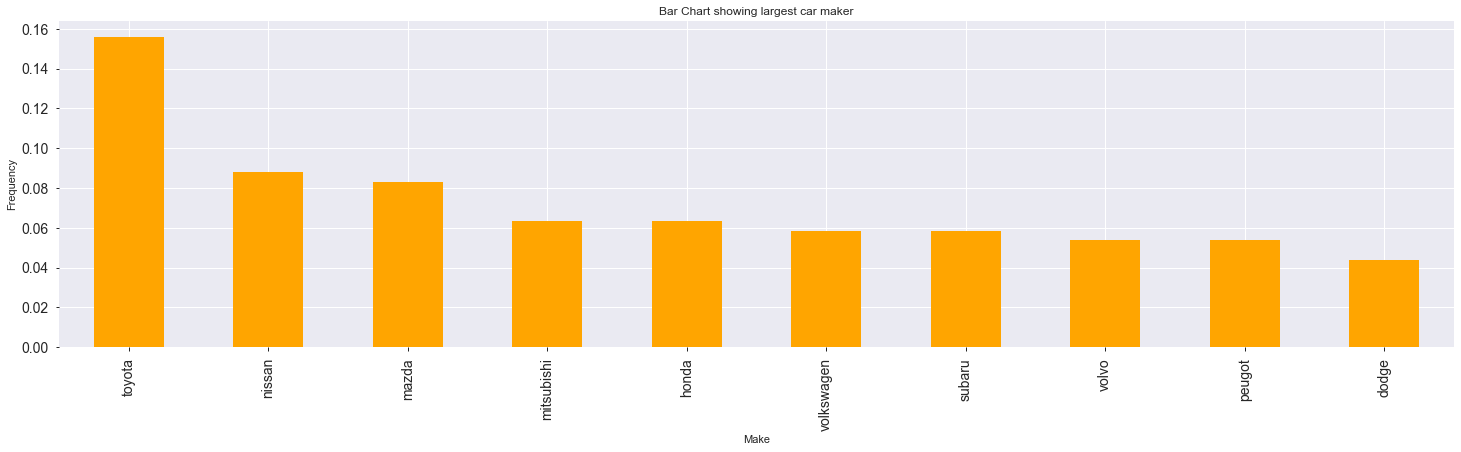

In [38]:
# Largest automobile maker

df_car['make'].value_counts(normalize=True)[:10].plot(figsize=(25,6), kind='bar', color='orange', fontsize=14)
plt.xlabel('Make')
plt.ylabel('Frequency')
plt.title('Bar Chart showing largest car maker')

- **Toyota** is the largest car maker with nearly **16%** followed by **Nissan** with **9%**

<a id=section50102></a>
#### 5.1.2 Most preferred fuel in automobile

Text(0.5, 1.0, 'Bar Chart showing most preferred fuel')

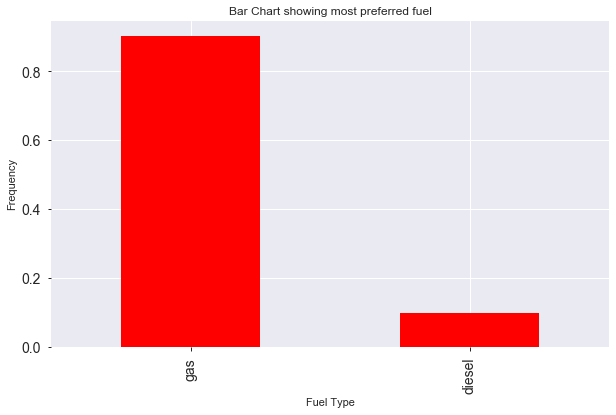

In [39]:
# Most preferred fuel

df_car['fuel-type'].value_counts(normalize=True).plot(figsize=(10,6), kind='bar', color='red', fontsize=14)
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.title('Bar Chart showing most preferred fuel')

- **Gas** is used as fuel in **90%** of automobiles

<a id=section50103></a>
#### 5.1.3 Most used aspiration in automobile

Text(0.5, 1.0, 'Bar Chart showing most used aspiration in automobiles')

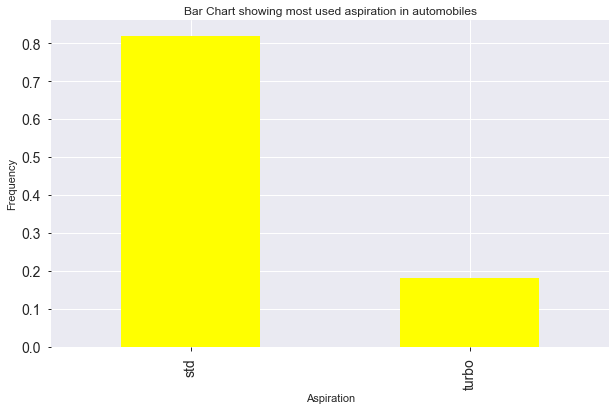

In [40]:
# Most used aspiration in automobile

df_car['aspiration'].value_counts(normalize=True).plot(figsize=(10,6), kind='bar', color='yellow', fontsize=14)
plt.xlabel('Aspiration')
plt.ylabel('Frequency')
plt.title('Bar Chart showing most used aspiration in automobiles')

- Around **82%** of automobiles have aspiration **std**

<a id=section50104></a>
#### 5.1.4 Number of doors preferred in automobiles

Text(0.5, 1.0, 'Bar Chart showing number of doors preferred in automobiles')

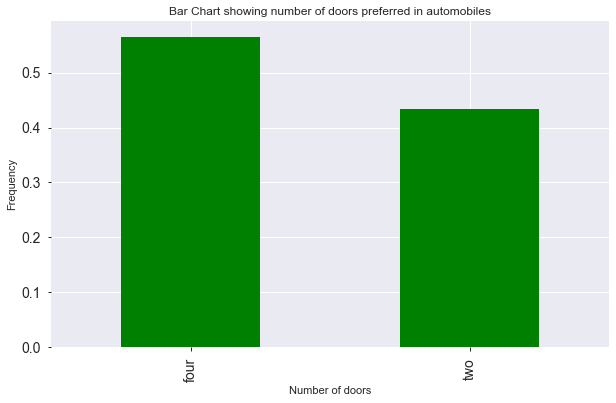

In [41]:
# Number of doors preferred in automobiles

df_car['num-of-doors'].value_counts(normalize=True).plot(figsize=(10,6), kind='bar', color='green', fontsize=14)
plt.xlabel('Number of doors')
plt.ylabel('Frequency')
plt.title('Bar Chart showing number of doors preferred in automobiles')

- Maximum of automobiles have four doors with **56%**

<a id=section50105></a>
#### 5.1.5 Most preferred body style in automobiles

Text(0.5, 1.0, 'Bar Chart showing most preferred body style in automobiles')

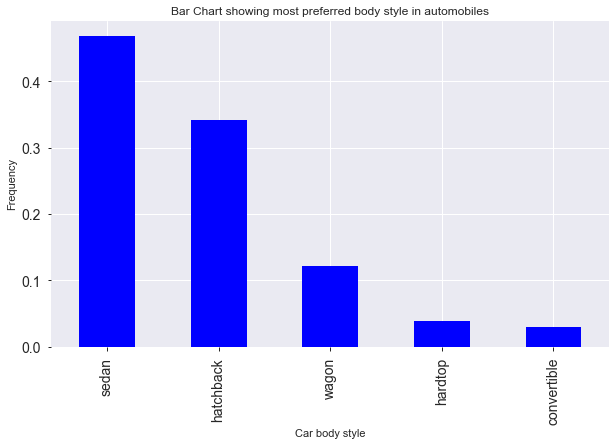

In [42]:
# Most preferred body style in automobiles

df_car['body-style'].value_counts(normalize=True).plot(figsize=(10,6), kind='bar', color='blue', fontsize=14)
plt.xlabel('Car body style')
plt.ylabel('Frequency')
plt.title('Bar Chart showing most preferred body style in automobiles')

- Automobiles have body style of **sedan** with **47%** followed by **hatchback** with **34%**

<a id=section50106></a>
#### 5.1.6 Most preferred drive wheels in cars

Text(0.5, 1.0, 'Bar Chart showing most preferred drive wheels in automobiles')

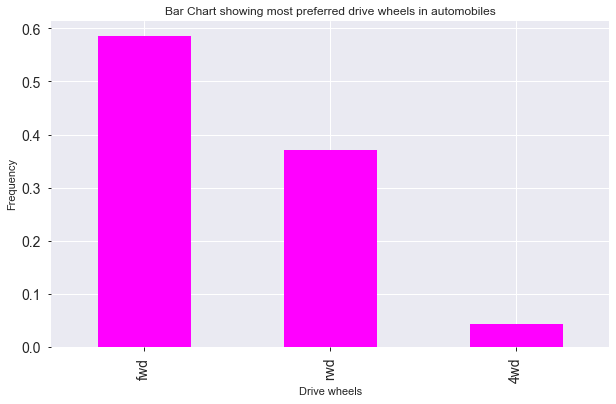

In [43]:
# Most preferred drive wheels in automobiles

df_car['drive-wheels'].value_counts(normalize=True).plot(figsize=(10,6), kind='bar', color='magenta', fontsize=14)
plt.xlabel('Drive wheels')
plt.ylabel('Frequency')
plt.title('Bar Chart showing most preferred drive wheels in automobiles')

- Most preferred drive wheels in automobiles is **fwd** with more than **55%** followed by **rwd** with more than **35%**

<a id=section50107></a>
#### 5.1.7 Most preferred engine location in automobiles

Text(0.5, 1.0, 'Bar Chart showing engine location in automobiles')

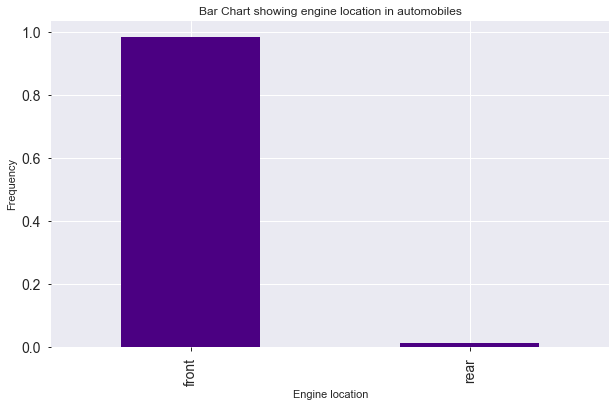

In [44]:
# Most preferred engine location in automobiles

df_car['engine-location'].value_counts(normalize=True).plot(figsize=(10,6), kind='bar', color='indigo', fontsize=14)
plt.xlabel('Engine location')
plt.ylabel('Frequency')
plt.title('Bar Chart showing engine location in automobiles')

- Most of the automobiles have engine location at the **front** with more than **95%**

<a id=section50108></a>
#### 5.1.8 Most preferred engine type in automobiles

Text(0.5, 1.0, 'Bar Chart showing engine type in automobiles')

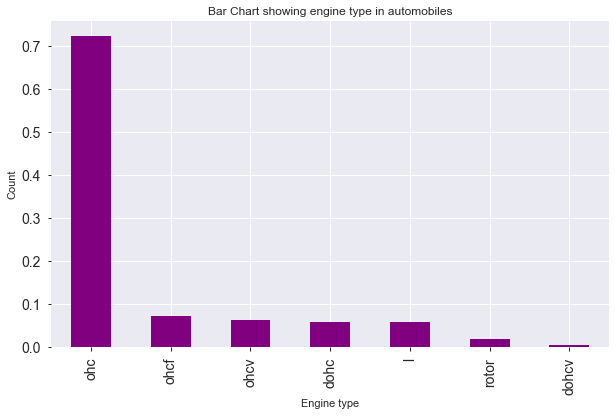

In [45]:
# Most preferred engine type in automobiles

df_car['engine-type'].value_counts(normalize=True).plot(figsize=(10,6), kind='bar', color='purple', fontsize=14)
plt.xlabel('Engine type')
plt.ylabel('Count')
plt.title('Bar Chart showing engine type in automobiles')

- Most of the automobiles have engine type **ohc** with more than **70%**

<a id=section50109></a>
#### 5.1.9 Most preferred number of cylinders in engine

Text(0.5, 1.0, 'Bar Chart showing number of cylinders preferred in engine mostly')

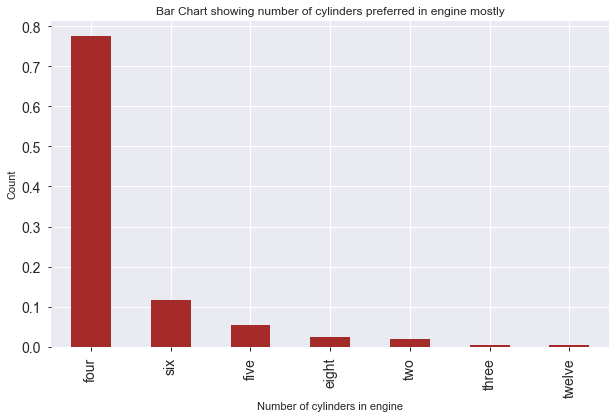

In [46]:
# Most preferred number of cylinders in engine

df_car['num-of-cylinders'].value_counts(normalize=True).plot(figsize=(10,6), kind='bar', color='brown', fontsize=14)
plt.xlabel('Number of cylinders in engine')
plt.ylabel('Count')
plt.title('Bar Chart showing number of cylinders preferred in engine mostly')

- Automobiles mostly prefer **four** cyliners engine with more than **75%**

<a id=section501010></a>
#### 5.1.10 Most preferred fuel system in engine

Text(0.5, 1.0, 'Bar Chart showing fuel system preferred in engine')

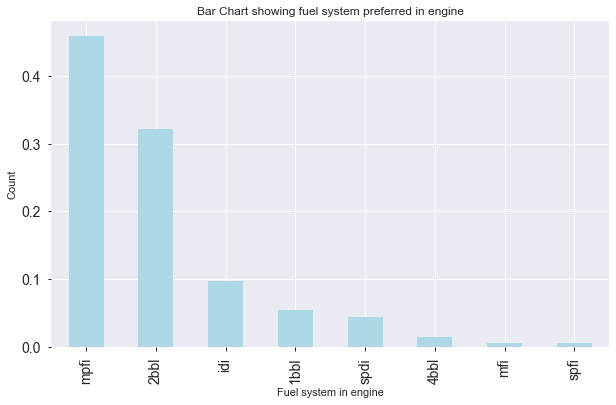

In [47]:
# Most preferred fuel system in engine

df_car['fuel-system'].value_counts(normalize=True).plot(figsize=(10,6), kind='bar', color='lightblue', fontsize=14)
plt.xlabel('Fuel system in engine')
plt.ylabel('Count')
plt.title('Bar Chart showing fuel system preferred in engine')

- More than **45%** of automobiles have **mpfi** fuel system in engine followed by **2bbl** fuel system in more than **30%** of automobiles

<a id=section501011></a>
#### 5.1.11 Range of engine size in automobiles

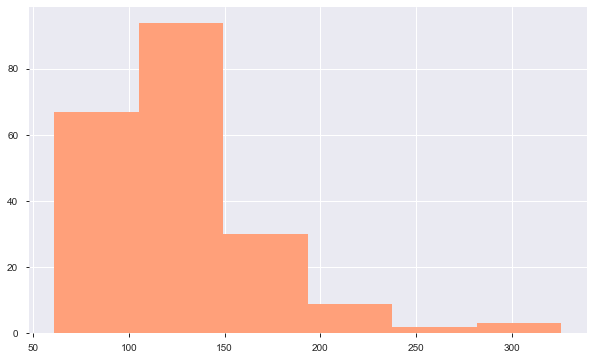

In [48]:
# Range of engine size in automobiles

df_car['engine-size'].hist(figsize=(10,6),bins=6,color='lightsalmon')

- Most of the automobiles have **engine-size** between **60** to **190**

<a id=section501012></a>
#### 5.1.12 Range of peak rpm in automobiles

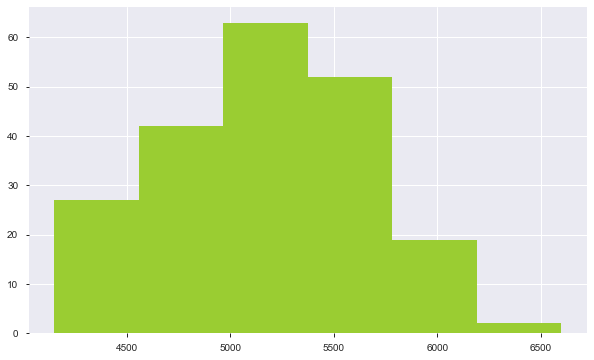

In [49]:
# Range of peak rpm in automobiles

df_car['peak-rpm'].hist(figsize=(10,6),bins=6,color='yellowgreen')

- **peak-rpm** mostly distributed between **4550** to **5750**

<a id=section501013></a>
#### 5.1.13 Range of curb weight in automobiles

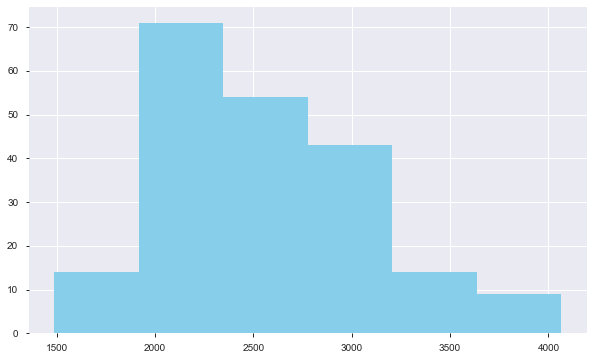

In [50]:
# Range of curb weight in automobiles

df_car['curb-weight'].hist(figsize=(10,6),bins=6,color='skyblue')

- Most of the vehicles **curb-weight** in the range **1900** to **3200**

<a id=section501014></a>
#### 5.1.14 Range of horsepower in automobiles

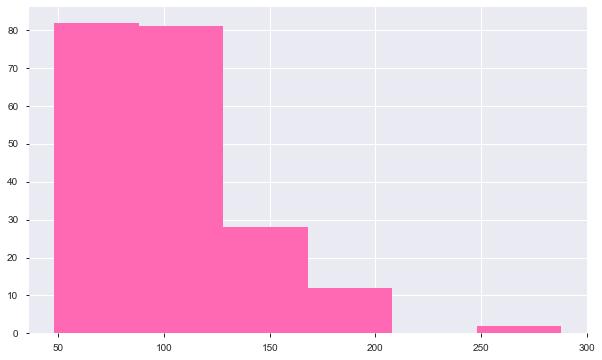

In [51]:
# Range of horsepower in automobiles

df_car['horsepower'].hist(figsize=(10,6),bins=6,color='hotpink')

- Most of the vehicles has **horse-power** in the range **50** to **125**

<a id=section501015></a>
#### 5.1.15 Range of price in automobiles

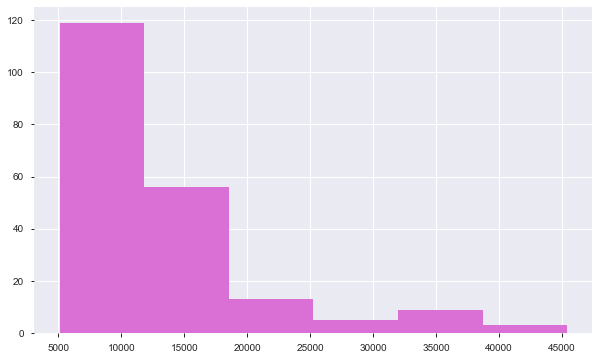

In [52]:
# Range of price in automobiles

df_car['price'].hist(figsize=(10,6),bins=6,color='orchid')

- Most of the vehicles **price** between **5000** to **18000**

<a id=section501016></a>
#### 5.1.16 Correlation analysis

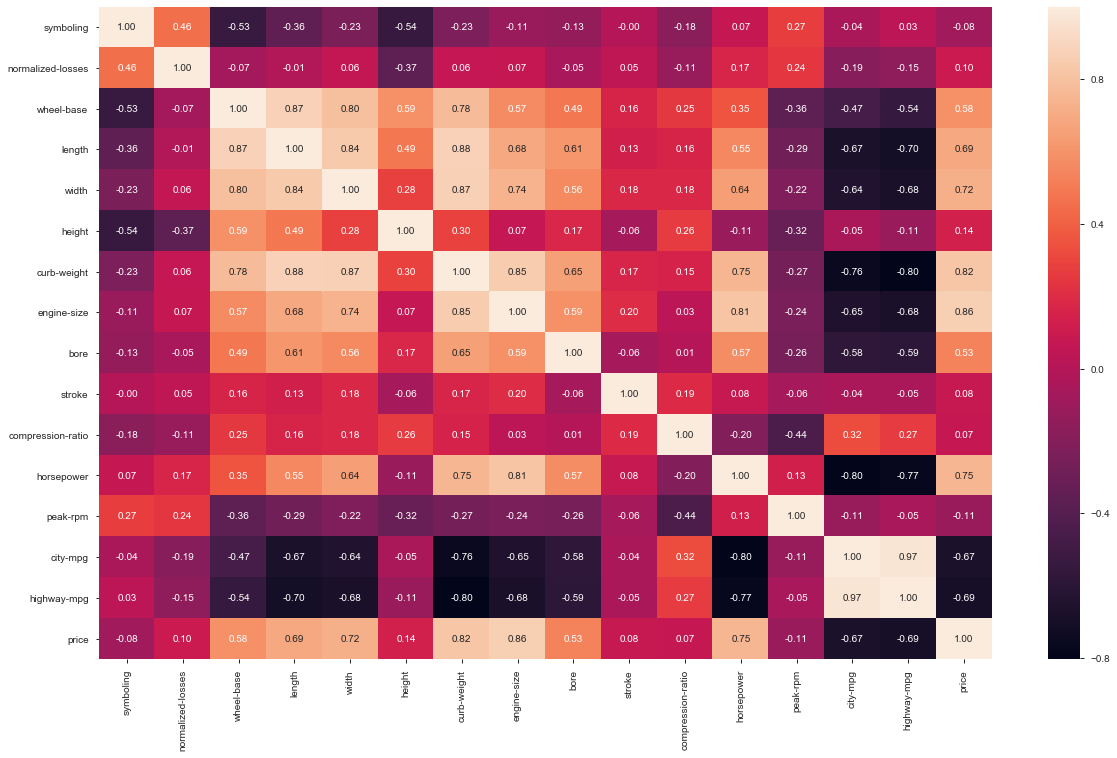

In [53]:
# Correlation analysis

corr = df_car.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True, fmt='.2f')

- **city-mpg**, **highway-mpg** are **highly** correlated<br><br>
- **curb-weight**, **engine-size** and **horsepower** are **positively** correlated

<a id=section502></a>
### 5.2 Analysis Based on Automobile Price

<a id=section50201></a>
#### 5.2.1 Price based on make

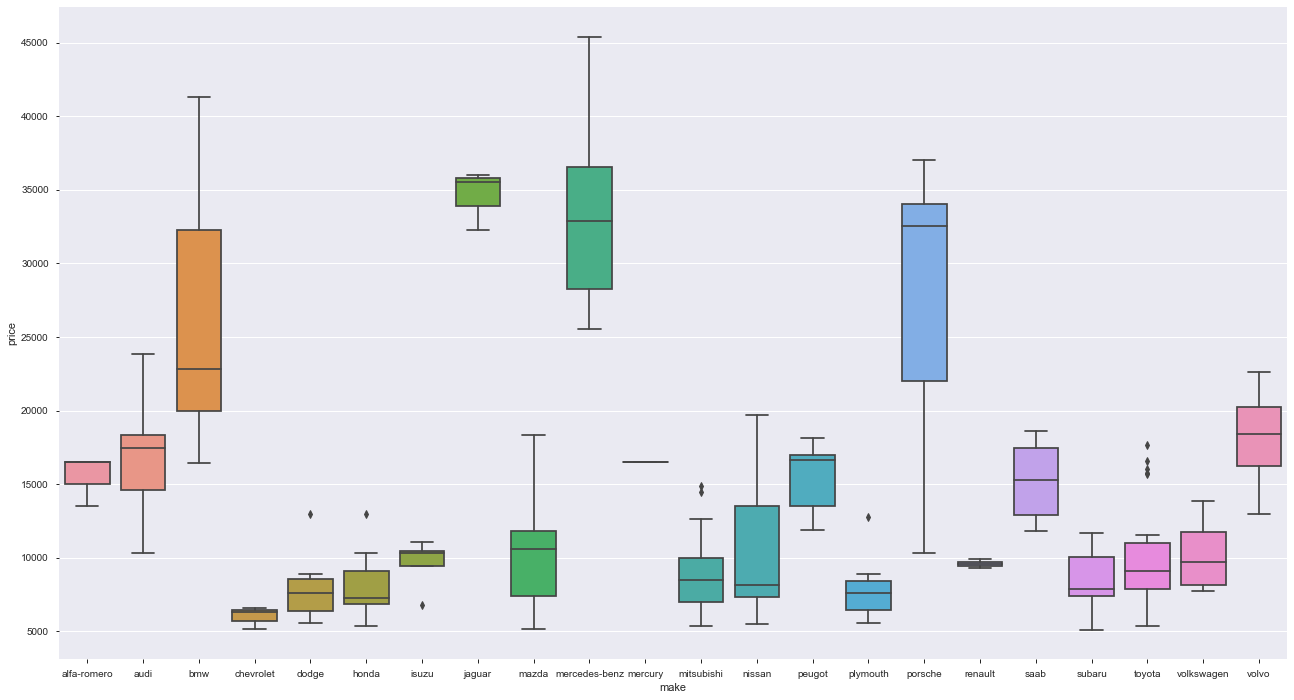

In [54]:
# Price based on make

plt.figure(figsize=(22,12))
sns.boxplot(x="make", y="price", data=df_car)

- **Mercedez-Benz**, **BMW**, **Jaguar**, **Porshe** produces expensive cars more than **20000**<br><br>
- **Cheverolet**, **dodge**, **honda**, **mitbushi**, **nissan**, **plymouth**, **subaru**, **toyata** produces budget cars with lower prices<br><br>
- There are some expensive models in **dodge**, **honda**, **mitbushi**, **plymouth**, **toyata** shown as outliers<br><br>
- There is some low priced models in **isuzu** shown as outliers<br><br>
- Most of the automobile comapany produces car in range below **20000**

<a id=section50202></a>
#### 5.2.2 Price based on body-style

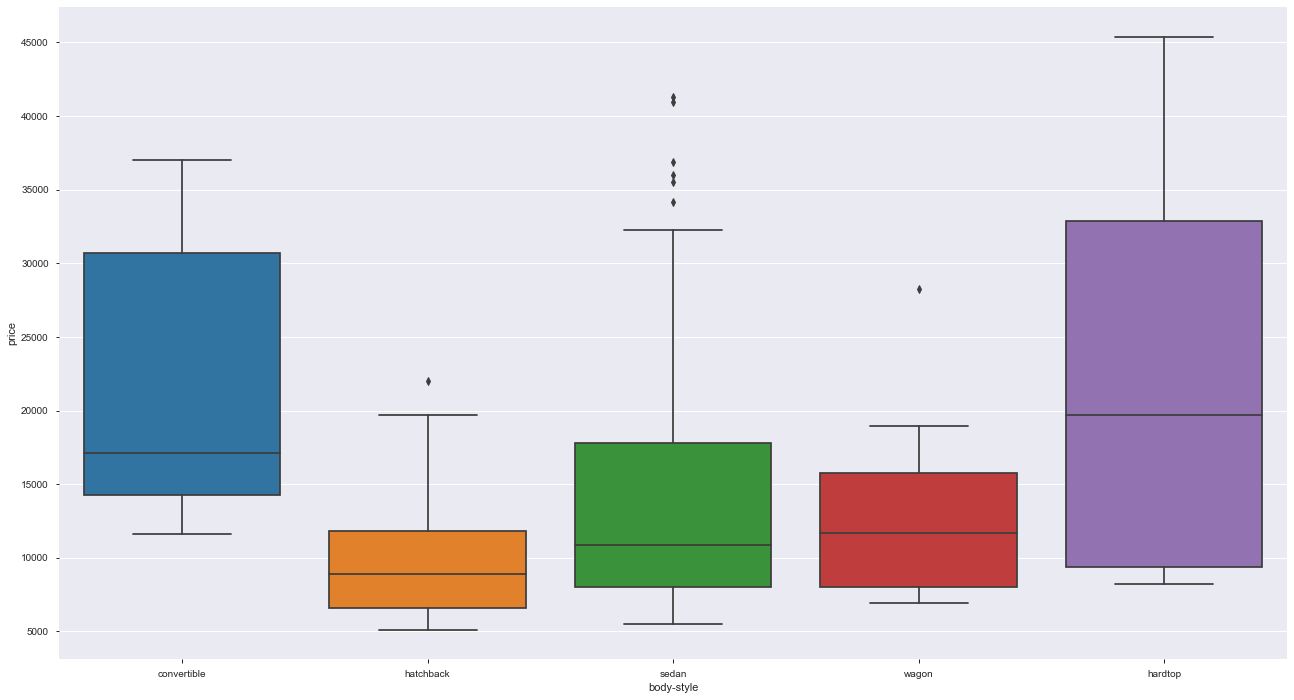

In [55]:
# Price based on body-style

plt.figure(figsize=(22,12))
sns.boxplot(x="body-style", y="price", data=df_car)

- **Hardtop** model is expensive in prices followed by **convertible** and **sedan** body style<br><br>
- **Hatchback** and **wagon** are low priced vehicles<br><br>
- There are some expensive models available in **sedan**, **hatchback** and  **wagon** body style shown here as outliers

<a id=section50203></a>
#### 5.2.3 Price based on body-style and aspiration

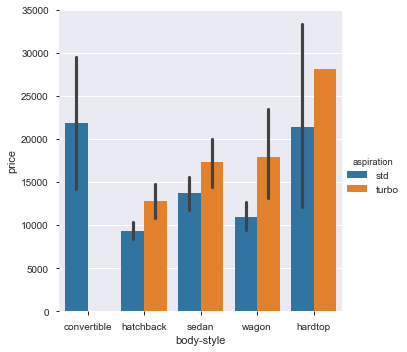

In [56]:
# Price based on body-style and aspiration

sns.catplot(data=df_car, x="body-style", y="price", hue="aspiration", kind="bar")

- **Turbo** models are **expensive** compared to standard models<br><br>
- **Convertible** has only **standard** edition with **expensive** cars<br><br>
- **hatchback**, **sedan** and **wagon** turbo models are available below **20000**

<a id=section50204></a>
#### 5.2.4 Price based on drive-wheels

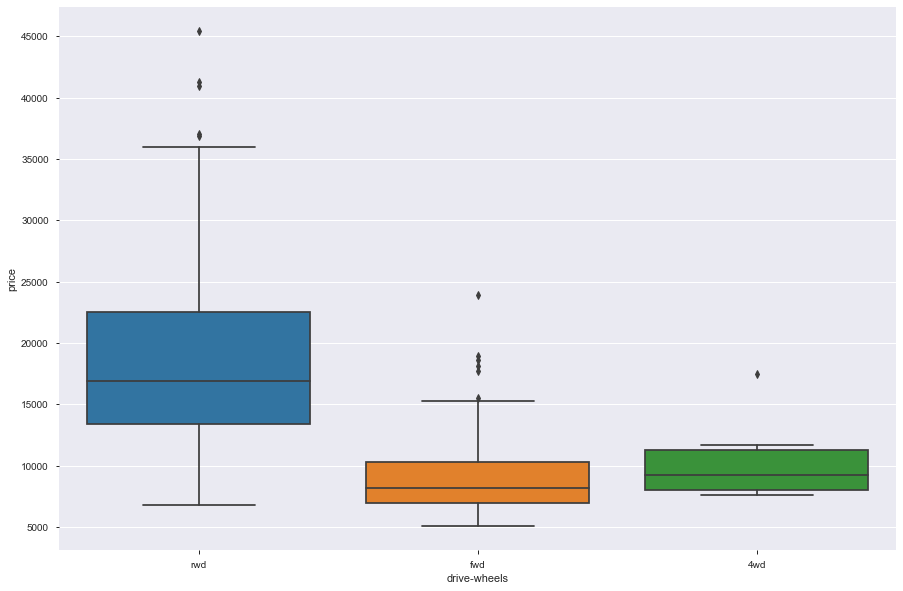

In [57]:
# Price based on drive-wheels

plt.figure(figsize=(15,10))
sns.boxplot(x="drive-wheels", y="price", data=df_car)

- **rwd** drive-wheels vehicles are expensive compared to **fwd** and **4wd**<br><br>
- **fwd** and **4wd** drive-wheels vehicles available in the price range of below **15000**<br><br>
- There are some expensive models near to **25000** in **fwd** drive-wheels vehicles

<a id=section50205></a>
#### 5.2.5 Price vs Automobile specifications

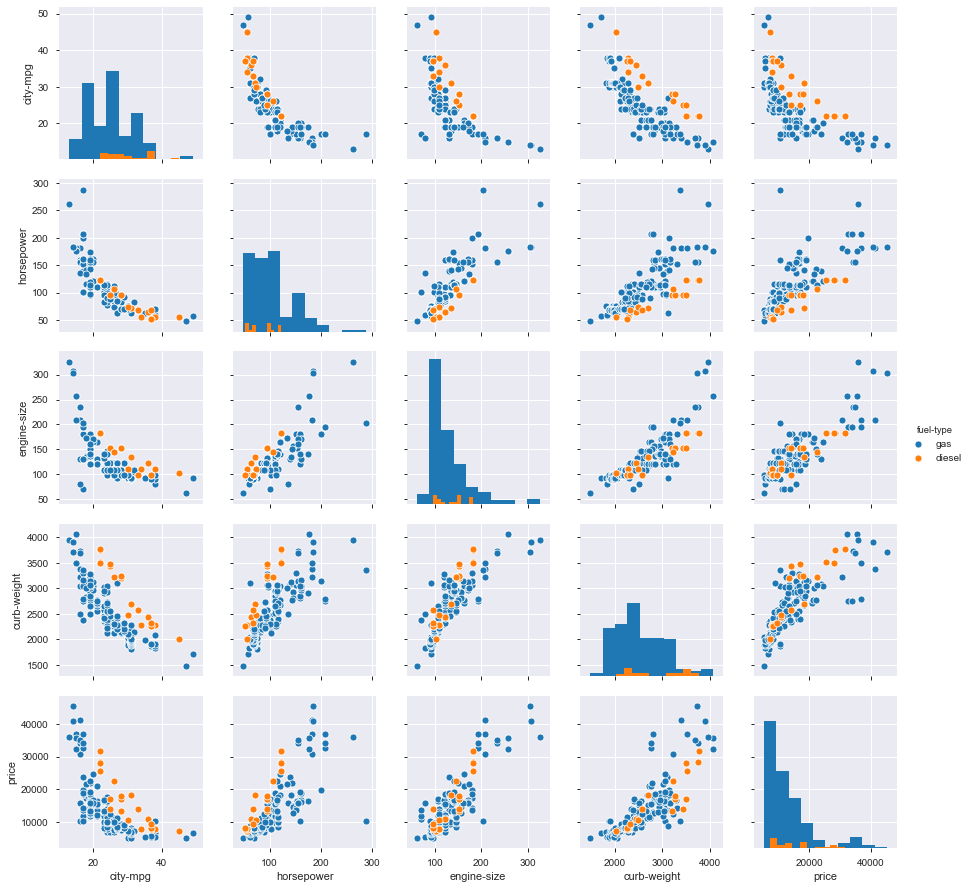

In [58]:
sns.pairplot(df_car[["city-mpg", "horsepower", "engine-size", "curb-weight","price", "fuel-type"]], hue="fuel-type", diag_kind="hist")

- Vehicle **Mileage** decrease as increase in **Horsepower**, **engine-size**, **curb-weight**<br><br>
- As **horsepower** increases the **engine-size** increases<br><br>
- **curb-weight** increases with the increase in **engine-size**<br><br>
- **engine-size** and **curb-weight** is positively correalted with **price**<br><br>
- **city-mpg** is negatively correlated with **price** as increase **horsepower** reduces the **mileage**

<a id=section503></a>
### 5.3 Analysis Based on Automobile Engine

<a id=section50301></a>
#### 5.3.1 Engine size based on engine-type for body-style and fuel-type

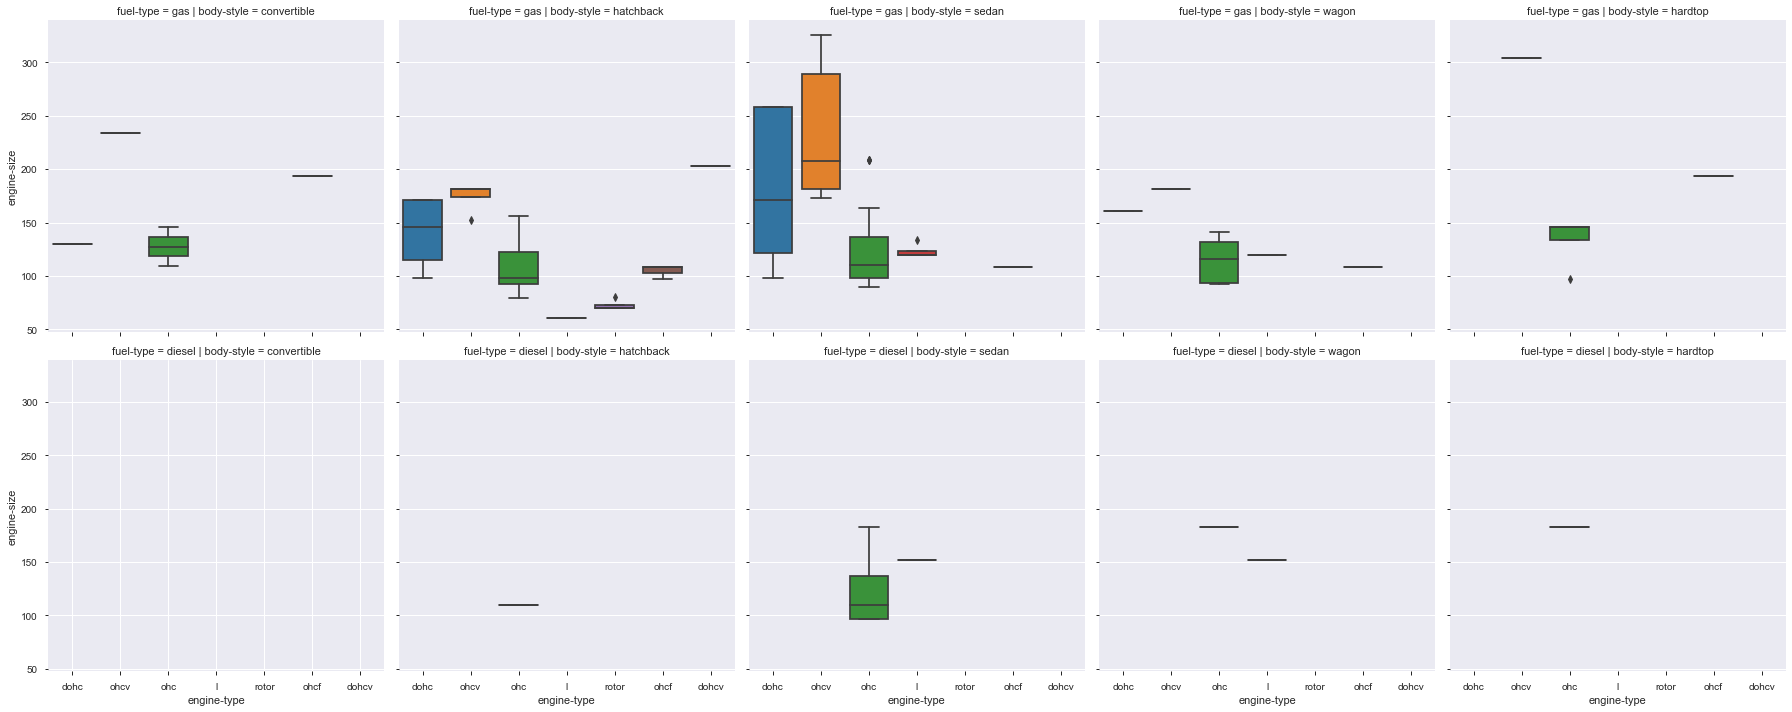

In [59]:
sns.factorplot(data=df_car, x="engine-type", y="engine-size", col="body-style",row="fuel-type", kind="box")

- **ohc** is the most used Engine Type both for **diesel** and **gas**<br><br>
- **Diesel** vehicle have Engine type **ohc** and **I** and engine size ranges between **90** to **190**<br><br>
- Engine type **ohcv** has the bigger Engine size ranging from **170** to **340**<br><br>
- Body-style **Hatchback** uses max variety of Engine Type followed by **sedan**<br><br>
- Body-style **Convertible** is not available with **Diesel** Engine type

<a id=section50302></a>
#### 5.3.2 Horsepower based on num-of-cylinders

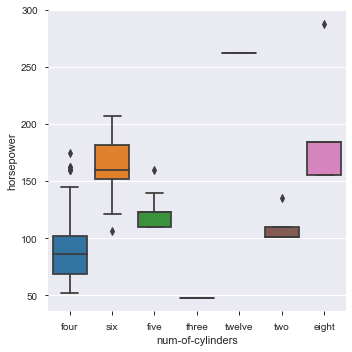

In [60]:
sns.catplot(data=df_car, x="num-of-cylinders", y="horsepower", kind="box")

- Vehicle with above **150** horsepower has **Six**, **Eight**, **Twelve** cyclinders<br><br>
- There are some **four**, **five** cyliner engines produces above **150** horsepower

<a id=section504></a>
### 5.4 Analysis Based on Losses

<a id=section50401></a>
#### 5.4.1 Normalized losses vs Symboling

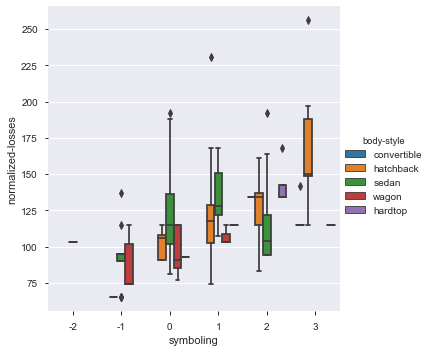

In [61]:
sns.catplot(data=df_car, x="symboling", y="normalized-losses", hue="body-style", kind="box")

- Here **+3** means **risky** vehicle and **-2** means **safe** vehicle<br><br>
- Increase in **risk rating** linearly increases in **normalised losses** in vehicle<br><br>
- **covertible** car and **hardtop** car has **hardly losses** with **risk rating** above **0**<br><br>
- **hatchback** cars has **highest losses** at **risk rating 3**<br><br>
- **sedan** and **wagon** car has **losses** even in **less risk (safe)rating**

<a id=section6></a>
## 6. Conclusion

- It is analyzed and found that more **powered** vehicles are **expensive** and **mileage** is less<br><br>
- Good **mileage** vehicles are **not much power** and that too have **less price**<br><br>
- Bulky vehicles are **expensive** as they produce more **horsepower**

<a id=section601></a>
### 6.1 Actionable Insights

- When you are considering **mileage** of the vehicle go for **hatchback**, **wagon** cars.<br><br>
- If you consider **power** of the vehicle then go for **sedan**, **convertible**, **hardtop** cars.